In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 2.23 ms (started: 2022-05-12 10:55:01 +00:00)


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from bisect import bisect_right
from sklearn import preprocessing 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import BallTree
from sklearn.neighbors import KDTree

time: 1.4 s (started: 2022-05-12 10:55:01 +00:00)


In [17]:
def gradientsFB(points,Neigh,mn=0.02):
    m = len(points)
    n = len(points[0])

    gradients = []
    for p in range(m):
        g = []
        for i in range(n):
            H,L = 0,0
            for j in range(len(Neigh[p])):
                if points[Neigh[p][j]][i] > points[p][i]:
                    H+=1
                else: 
                    L+=1

            #print(H,L)
            grad = abs((H-L)/max(H,L))
            if max(H,L) < mn*m:
                g.append(0)
            else:
                g.append(grad)
               
        gd = 0
        for i in g:
            gd += i**2
        gradients.append(gd)
    print(gradients)
    return gradients

def divideByClass(x,y):
    classes = np.unique(y)
    #print(classes)
    X = []
    for c in classes:
        X.append([])

    for i in range(len(x)):
        t = -1
        for j in range(len(classes)):
            if classes[j] == y[i]:
                t = j
                break

        X[t].append(x[i])

    return X,classes


def FBPE_KNN_BT_Sampling(x,y,r,d=0.6):
    x = np.array(x)
    X,classes = divideByClass(x,y)

    red = []
    for i in range(len(X)):
        xc = np.array(X[i])
        preprocessing.StandardScaler().fit(xc)
        ball_tree = BallTree(xc)
        Neigh = []
        for j in range(len(xc)):
            ind = np.array(ball_tree.query_radius([xc[j]], r=d))
            Neigh.append(ind[0].astype(int))

        g = gradientsFB(xc,Neigh)
        gd = ((g[j],j) for j in range(len(g)))
        gd = sorted(gd)
        gd.reverse()
        
        x_ext = [xc[gd[j][1]] for j in range(int(len(g)*r))]
        ext = [(x_ext[j],classes[i]) for j in range(len(x_ext))]
        red.extend(ext)

        print(i,len(red))

    np.random.shuffle(red)

    x_train_red = [red[i][0] for i in range(len(red))]
    y_train_red = [red[i][1] for i in range(len(red))]

    return x_train_red, y_train_red

def FBPE_KNN_KDT_Sampling(x,y,r,d=0.6):
    x = np.array(x)
    X,classes = divideByClass(x,y)

    red = []
    for i in range(len(X)):
        xc = np.array(X[i])
        preprocessing.StandardScaler().fit(xc)
        #xc = preprocessing.normalize(xc)
        tree = KDTree(xc)
        Neigh = []
        for j in range(len(xc)):
            ind = np.array(tree.query_radius([xc[j]], r=d))
            Neigh.append(ind[0].astype(int))

        g = gradientsFB(xc,Neigh)
        gd = ((g[j],j) for j in range(len(g)))
        gd = sorted(gd)
        gd.reverse()
        
        x_ext = [xc[gd[j][1]] for j in range(int(len(g)*r))]
        ext = [(x_ext[j],classes[i]) for j in range(len(x_ext))]
        red.extend(ext)

        print(i,len(red))

    np.random.shuffle(red)

    x_train_red = [red[i][0] for i in range(len(red))]
    y_train_red = [red[i][1] for i in range(len(red))]

    return x_train_red, y_train_red


time: 346 ms (started: 2022-05-12 10:58:51 +00:00)


In [4]:
def plot(red_X,red_Y,P,C):

    X = [P[i][0] for i in range(len(P))]
    Y = [P[i][1] for i in range(len(P))]
    plt.scatter(X, Y, c='b')
    Xr = [red_X[i][0] for i in range(len(red_X))]
    Yr = [red_X[i][1] for i in range(len(red_X))]
    plt.scatter(Xr, Yr, c='r')
    plt.grid()


time: 7.67 ms (started: 2022-05-12 10:55:03 +00:00)


[0.10437959456449099, 0.48187920552592917, 0.1878251821019771, 0.5472049382716049, 0, 0.4082684799097751, 0.05165816326530613, 0.27557688632164623, 0.1460290573527921, 0.7875147928994083, 0.10594951827922938, 0.4491381963681133, 0.30250000000000005, 0.15575051100329554, 0.1360444444444444, 0.37023009709846366, 0.10737238569488458, 0.3086756838151928, 0.13283193685836028, 0.06786624114666442, 0, 0.1805307984947707, 0.030271262676307992, 0.23302984878369493, 0.0915547520661157, 0.38602076124567475, 0.0875901910906189, 0.13144427106258105, 0.19294412004998077, 0.633480361268641, 0.6712018140589568, 0, 0.31153629130022703, 0.1274629436683226, 0, 0.199919104814882, 0.4486067753497514, 0.20658324567885733, 0.22278781764242797, 0, 0.1566727025803531, 0.39235479373717175, 0.01008541042478774, 0.14649895725676612, 0.26747046492878257, 0.024221931403991773, 0.08811020710059171, 0.12167856713981398, 0.12276400367309458, 0.14331173736865, 0.11779119564071514, 0.3741834915576109, 0.1553763552746278

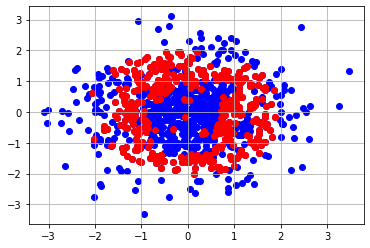

time: 465 ms (started: 2022-05-12 10:58:05 +00:00)


In [16]:
X = np.random.normal(0,1,1000)
Y = np.random.normal(0,1,1000)

P = [(X[i],Y[i]) for i in range(1000)]
C = np.full(1000,0)
red_X, red_Y = FBPE_KNN_KDT_Sampling(P,C,0.4)
print(len(red_X),len(P))
plot(red_X, red_Y, P, C)